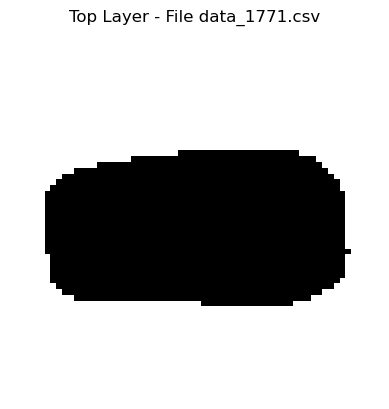

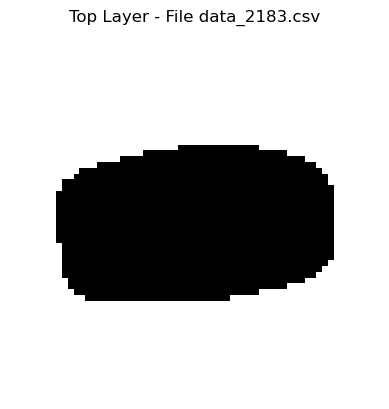

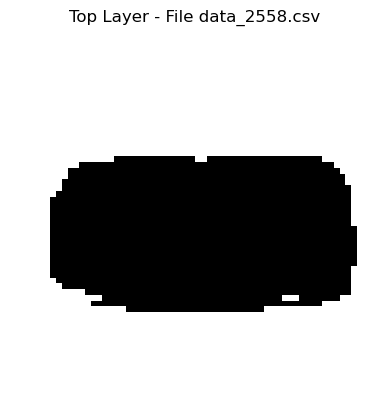

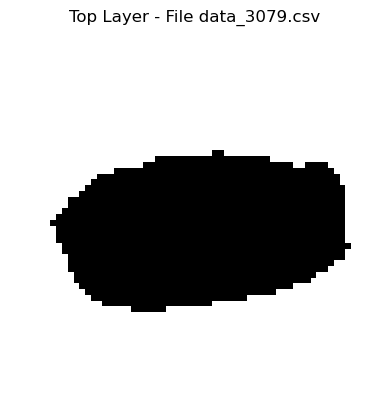

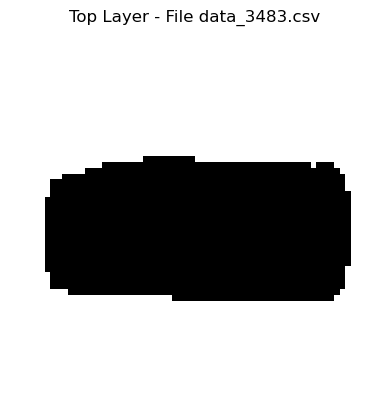

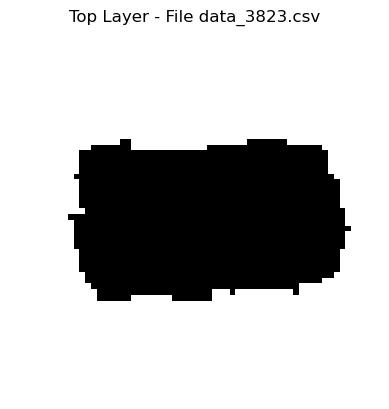

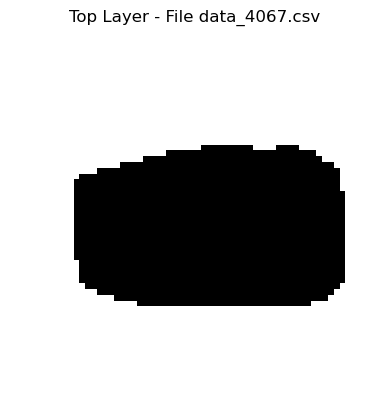

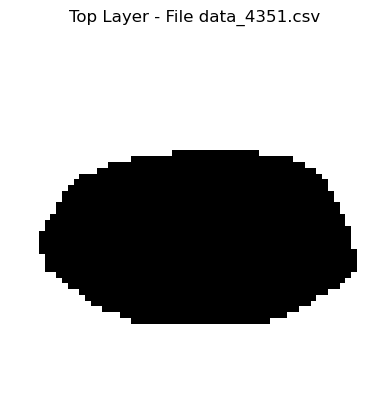

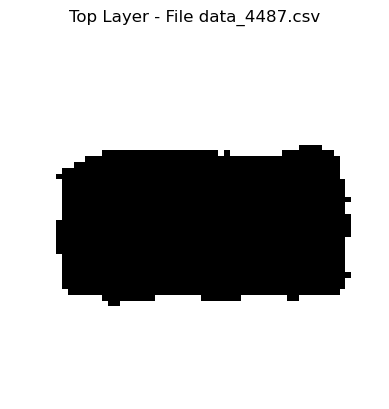

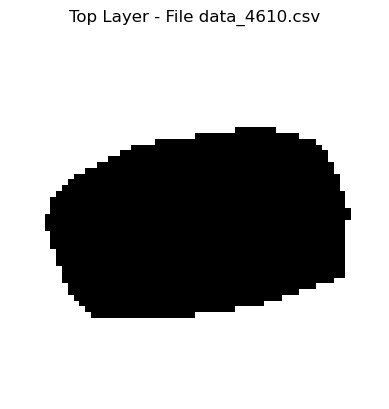

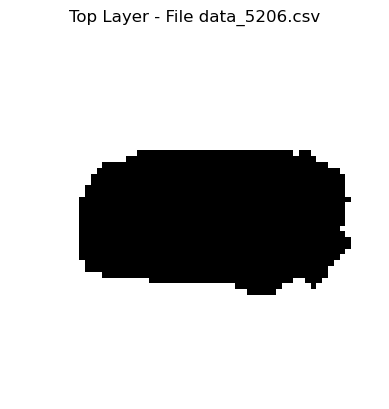

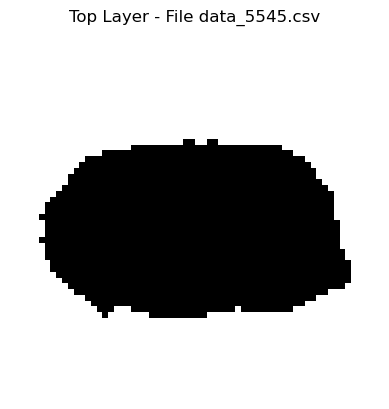

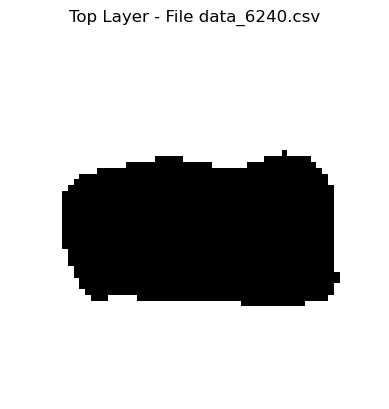

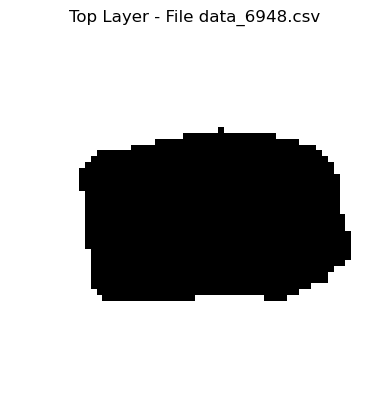

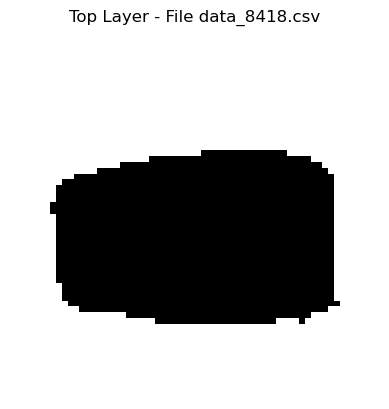

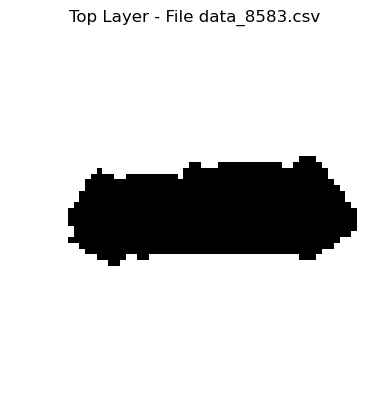

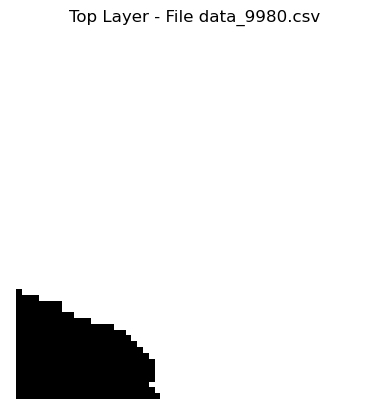

Saved (17, 64, 64, 64) array to voxel_data.npy


In [75]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from math import floor
from glob import glob

def process_csv_files(folder_path, voxel_size=0.015625, grid_size=64, plot_top_layer=True, output_file='voxel_data.npy'):
    all_voxel_arrays = []

    csv_files = glob(os.path.join(folder_path, '*.csv'))

    for idx, file in enumerate(csv_files):
        # Load CSV as (n,3) array
        coords = pd.read_csv(file, header=None).values  # Assumes no header
        
        coords=coords+[0.5078125,0.5078125,0.5078125]
                
        # Scale and floor to get voxel indices
        indices = np.floor(coords / voxel_size).astype(int)

        # Clamp indices to be within [0, 63]
        indices = np.clip(indices, 0, grid_size - 1)

        # Create voxel grid
        voxel_grid = np.ones((grid_size, grid_size, grid_size), dtype=np.uint8)

        # Set occupied voxels to 0
        for x, z, y in indices:
            voxel_grid[x, y, z] = 0

        # Plot top layer (along z-axis)
        if plot_top_layer:
            top_layer = voxel_grid[:, :, grid_size - 1]
            plt.imshow(top_layer, cmap='gray')
            plt.title(f"Top Layer - File {os.path.basename(file)}")
            plt.axis('off')
            plt.show()

        all_voxel_arrays.append(voxel_grid)

    # Stack all into a single array
    result_array = np.stack(all_voxel_arrays)  # Shape: (n_files, 64, 64, 64)

    # Save the result
    np.save(output_file, result_array)
    print(f"Saved {result_array.shape} array to {output_file}")
    return result_array

# Example usage
folder_path = r'C:\Users\ne23946\OneDrive - University of Bristol\Teaching and CPD\MSc Data Science\Data\1_circular_end_pocket'  # Replace with your folder path
result_array=process_csv_files(folder_path)